In [ ]:
import torch

# define first vector
w = torch.tensor([1., 0.], requires_grad= True) # size is [4]

# unsqueeze v1 to make it of size [1,4]
w = torch.unsqueeze(w,0)
print("Size of w:",w.size())

# define and unsqueeze second vector
a = torch.tensor([0., 0.], requires_grad=True)
a = torch.unsqueeze(a, 0)
print("Size of a:",a.size())


# define and unsqueeze second vector
b = torch.tensor([2., 0.])
b = torch.unsqueeze(b, 0)
print("Size of b:",b.size())

print("Vector w:", w)
print("Vector a:", a)
print("Vector b:", b)
# create an instance of the PairwiseDistance
pdist = torch.nn.PairwiseDistance(p=2)

# compute the distance
output = pdist(w, a) + pdist(w, b) 

# display the distance
print("Pairwise Distance:",output)

Size of w: torch.Size([1, 2])
Size of a: torch.Size([1, 2])
Size of b: torch.Size([1, 2])
Vector w: tensor([[1., 0.]], grad_fn=<UnsqueezeBackward0>)
Vector a: tensor([[0., 0.]], grad_fn=<UnsqueezeBackward0>)
Vector b: tensor([[2., 0.]])
Pairwise Distance: tensor([2.], grad_fn=<AddBackward0>)


In [ ]:
output.backward()

In [ ]:
w.grad

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:

a = torch.tensor([1., 0.])
b = torch.tensor([0., 1.])
w = torch.tensor([0., 0.])
a.requires_grad_()
b.requires_grad_()
w.requires_grad_()
# create an instance of the PairwiseDistance
pdist = torch.nn.PairwiseDistance(p=2)

# compute the distance
z = pdist(w, a) + pdist(w, b) 
  
# dy/da=2*a=10,8
# dy/db=5
  
# computing gradient
z.backward()
  
# printing out
print('Gradient of a', a.grad)
print('Gradient of b', b.grad)
print('Gradient of w', w.grad)

Gradient of a tensor([ 1.0000e+00, -1.0000e-06])
Gradient of b tensor([-1.0000e-06,  1.0000e+00])
Gradient of w tensor([-1.0000, -1.0000])


In [ ]:
with torch.no_grad():
  w -= 0.2*w.grad

In [ ]:
w

tensor([0.2000, 0.2000], requires_grad=True)

## Update the point using gradient descent

In [ ]:

a = torch.tensor([1., 0.])
b = torch.tensor([0., 1.])
w = torch.tensor([0., 0.])
#a.requires_grad_()
#b.requires_grad_()
w.requires_grad_()
# create an instance of the PairwiseDistance
pdist = torch.nn.PairwiseDistance(p=2)

for epoch in range(30):
  print('\n', epoch)
  # compute the distance
  z = pdist(w, a) + pdist(w, b) 
  print('DISTANCE: ' , z) 
  print('W', w)
  # dy/da=2*a=10,8
  # dy/db=5
    
  # computing gradient
  z.backward()
    
  # printing out
  #print('Gradient of a', a.grad)
  #print('Gradient of b', b.grad)
  print('Gradient of w', w.grad)

  with torch.no_grad():
    w -= 0.6*w.grad

  w.grad = None
  


 0
DISTANCE:  tensor(2.0000, grad_fn=<AddBackward0>)
W tensor([0., 0.], requires_grad=True)
Gradient of w tensor([-1.0000, -1.0000])

 1
DISTANCE:  tensor(1.4422, grad_fn=<AddBackward0>)
W tensor([0.6000, 0.6000], requires_grad=True)
Gradient of w tensor([0.2774, 0.2774])

 2
DISTANCE:  tensor(1.4266, grad_fn=<AddBackward0>)
W tensor([0.4336, 0.4336], requires_grad=True)
Gradient of w tensor([-0.1862, -0.1862])

 3
DISTANCE:  tensor(1.4200, grad_fn=<AddBackward0>)
W tensor([0.5453, 0.5453], requires_grad=True)
Gradient of w tensor([0.1276, 0.1276])

 4
DISTANCE:  tensor(1.4170, grad_fn=<AddBackward0>)
W tensor([0.4687, 0.4687], requires_grad=True)
Gradient of w tensor([-0.0883, -0.0883])

 5
DISTANCE:  tensor(1.4155, grad_fn=<AddBackward0>)
W tensor([0.5217, 0.5217], requires_grad=True)
Gradient of w tensor([0.0613, 0.0613])

 6
DISTANCE:  tensor(1.4149, grad_fn=<AddBackward0>)
W tensor([0.4849, 0.4849], requires_grad=True)
Gradient of w tensor([-0.0427, -0.0427])

 7
DISTANCE:  tenso

## Add more clusters

In [ ]:
a = torch.tensor([6., 0.])
b = torch.tensor([0., 6.])

for x in range(-3, 4):
  print(x)
  

-3
-2
-1
0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


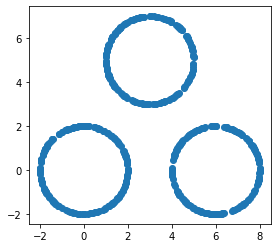

In [ ]:
import torch
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
# radius of the circle
circle_r = 2
# center of the circle (x, y)
circle_ys = [0., 0., 5.]
circle_xs = [0., 6., 3.]

x_all = []
y_all = []

for i in range(len(circle_xs)):
  circle_x = circle_xs[i]
  circle_y = circle_ys[i]


  for i in range(200):
  # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = circle_r
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    x_all.append(x)
    y_all.append(y)
  
  #print("Random point", (x, y))

plt.scatter(x_all, y_all)
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
len(x_all)

600

In [ ]:
c1 = torch.tensor([circle_xs[0], circle_ys[0]])
c2 = torch.tensor([circle_xs[1], circle_ys[1]])
c3 = torch.tensor([circle_xs[2], circle_ys[2]])


ws = []
pdist = torch.nn.PairwiseDistance(p=2)




for ind in range(len(x_all)):
  w = torch.tensor([x_all[ind], y_all[ind]])
  #a.requires_grad_()
  #b.requires_grad_()
  w.requires_grad_()
  ws.append(w)

  #print(ws)





  

In [ ]:

for epoch in range(50):
  #print('\n', epoch)
  # compute the distance
  z = 0


  for point in ws:
    #z += -1*((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += 1/((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += math.log((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += -1*((pdist(point, c1)**2) + (pdist(point, c2)**2) + (pdist(point, c3)**2))
    z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))

  
  
  z.backward()
  
  with torch.no_grad():
    for point in ws: 
      point -= 0.5*point.grad

      point.grad = None

In [ ]:
'''
# 2-point 
a = torch.tensor([5., 0.])
b = torch.tensor([0., 5.])


total_loss = 0
ws = []
pdist = torch.nn.PairwiseDistance(p=2)

for ind in range(500):
  w = torch.tensor([x_all[ind], y_all[ind]])
  #a.requires_grad_()
  #b.requires_grad_()
  w.requires_grad_()
  ws.append(w)

  #print(ws)





for epoch in range(30):
  #print('\n', epoch)
  # compute the distance
  z = 0


  for point in ws:
    z += -1*(pdist(point, a) + pdist(point, b))

  
  
  z.backward()
  
  with torch.no_grad():
    for point in ws: 
      point -= 0.3*point.grad

      point.grad = None

'''

"\n# 2-point \na = torch.tensor([5., 0.])\nb = torch.tensor([0., 5.])\n\n\ntotal_loss = 0\nws = []\npdist = torch.nn.PairwiseDistance(p=2)\n\nfor ind in range(500):\n  w = torch.tensor([x_all[ind], y_all[ind]])\n  #a.requires_grad_()\n  #b.requires_grad_()\n  w.requires_grad_()\n  ws.append(w)\n\n  #print(ws)\n\n\n\n\n\nfor epoch in range(30):\n  #print('\n', epoch)\n  # compute the distance\n  z = 0\n\n\n  for point in ws:\n    z += -1*(pdist(point, a) + pdist(point, b))\n\n  \n  \n  z.backward()\n  \n  with torch.no_grad():\n    for point in ws: \n      point -= 0.3*point.grad\n\n      point.grad = None\n\n"

In [ ]:
new_x = list()
new_y = list()
for i in range(len(ws)):
  x_coord = float(ws[i][0])
  y_coord = float(ws[i][1])
  new_x.append(x_coord)
  new_y.append(y_coord)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


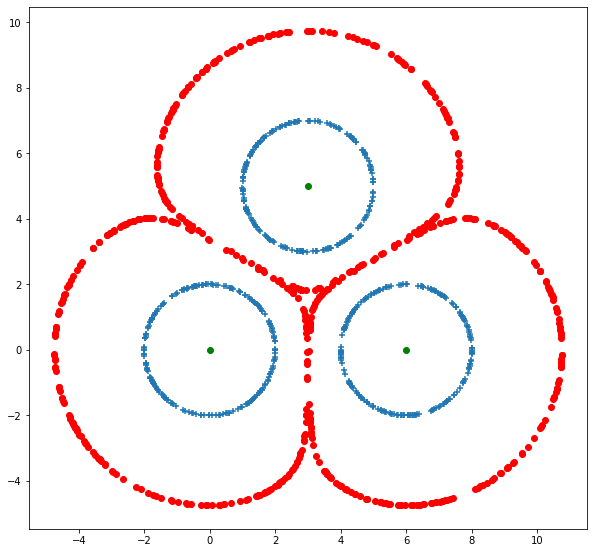

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(circle_xs[0], circle_ys[0], c='green')
plt.scatter(circle_xs[1], circle_ys[1], c='green')
plt.scatter(circle_xs[2], circle_ys[2], c='green')

plt.scatter(new_x, new_y, c='red')
plt.scatter(x_all, y_all, marker = '+')
plt.axes().set_aspect('equal')

In [ ]:
lr = 0.1
for j in range(len(x_all)):
  x_all[j] += lr* x_all[j].grad
  y_all[j] += lr* y_all[j].grad
  
  x_all[j].grad = None
  y_all[j].grad = None
  

AttributeError: ignored

In [ ]:
  # printing out
  #print('Gradient of a', a.grad)
  #print('Gradient of b', b.grad)
  print('Gradient of w', w.grad)

  with torch.no_grad():
    w -= 0.6*w.grad

  w.grad = None

## Hypershpere

In [ ]:
import random
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
z = []


# Random float number between range 10.5 to 75.5
for i in range(5000):
  x.append(random.uniform(-1, 1))
  y.append(random.uniform(-1, 1))
  z.append(random.uniform(-1, 1))


In [ ]:
import math
for i in range(len(x)):
  norm = math.sqrt(x[i]**2 + y[i]**2 + z[i]**2)
  #print(norm)
  x[i] /= norm
  y[i] /= norm
  z[i] /= norm

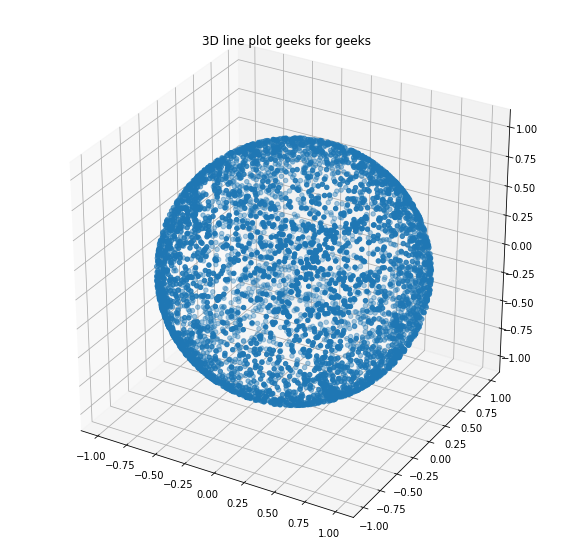

In [ ]:
fig = plt.figure(figsize=(10,10))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 

 
# plotting
ax.scatter(x, y, z)
ax.set_title('3D line plot geeks for geeks')

#plt.axes().set_aspect('equal')
plt.show()

In [ ]:

c1 = [0.5, -1, 0]
c2 = [0.2, -1, 0.5]
c3 = [0., -1, 0]

from numpy import array
from numpy.linalg import norm

c1 /= norm(array(c1), 2)
c2 /= norm(array(c2), 2)
c3 /= norm(array(c3), 2)

In [ ]:
c1

array([ 0.4472136 , -0.89442719,  0.        ])

In [ ]:
samples = []
#centroid = [x[0], y[0], z[0]]
for i in range(len(x)):
  point = [x[i], y[i], z[i]]
  product = np.dot(c1, point)
  lower_bound = 0.97
  upper_bound = 0.99
  #if(product > 0.8 and product < 0.9):
  if(product > lower_bound and product < upper_bound):
      samples.append(i)

  product = np.dot(c2, point)
  #if(product > 0.8 and product < 0.9):
  if(product > lower_bound and product < upper_bound):
      samples.append(i)

  product = np.dot(c3, point)
  #if(product > 0.8 and product < 0.9):
  if(product > lower_bound and product < upper_bound):
      samples.append(i)


In [ ]:
len(samples)

127

In [ ]:
ring_x = [x[i] for i in samples]
ring_y = [y[i] for i in samples]
ring_z = [z[i] for i in samples]

In [ ]:
len([x[i] for i in samples])

127

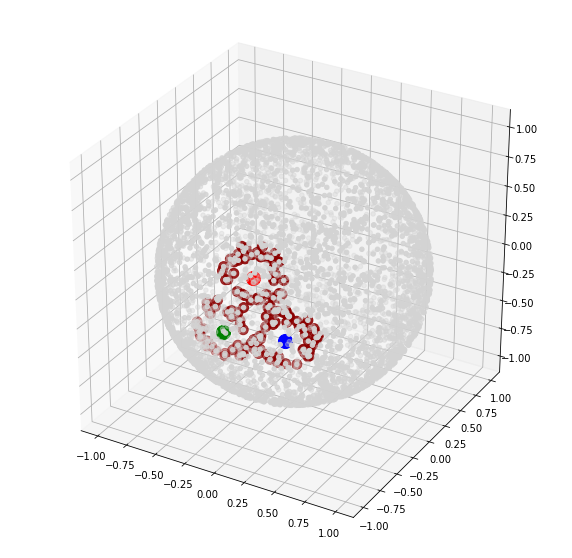

In [ ]:
fig = plt.figure(figsize=(10,10))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.scatter(x, y, z, c='lightgrey')
ax.scatter(c1[0], c1[1], c1[2], c='blue', s = 200)
ax.scatter(c2[0], c2[1], c2[2], c='red', s = 200)
ax.scatter(c3[0], c3[1], c3[2], c='green', s = 200)
ax.scatter(ring_x, ring_y, ring_z, c='darkred', s = 100)
#ax.set_title('3D line plot geeks for geeks')

#plt.axes().set_aspect('equal')
plt.show()

In [ ]:
#Here

In [ ]:
import torch
epochs = 100
ws = []

for ind in range(len(ring_x)):
  w = torch.tensor([ring_x[ind], ring_y[ind], ring_z[ind]])

  w.requires_grad_()
  ws.append(w)
  

In [ ]:
len(ws)

127

In [ ]:
from math import log
c1 = torch.tensor(c1)
c2 = torch.tensor(c2)
c3 = torch.tensor(c3)
c1 = c1.float()
c2 = c2.float()
c3 = c3.float()

for epoch in range(epochs):
  #print('\n', epoch)
  # compute the distance
  loss = 0


  for point in ws:

    # Simple L2 distance-based loss - equal penalization 
    #z += -1*((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))


    # y = 1/x loss function - 'highly penalizes a point for being close to centroid
    #z += 1/((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))


    #z += math.log((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += -1*((pdist(point, c1)**2) + (pdist(point, c2)**2) + (pdist(point, c3)**2))
    #z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))

    cos_1 = torch.dot(c1, point)
    cos_2 = torch.dot(c2, point)
    cos_3 = torch.dot(c3, point)
    #z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))
    #z += -1*(torch.log(1 - cos_1) + torch.log(1 - cos_2))

    # our final loss that 'highly' penalizes a point for being close to centroid (voiled graph in ppt)
    #loss += -1*(torch.log(1 - cos_1)) + torch.log(torch.tensor(2)) + -1*(torch.log(1 - cos_2)) + torch.log(torch.tensor(2)) + -1*(torch.log(1 - cos_3)) + torch.log(torch.tensor(2))
    
    # SupCon
    # From equation (2) in SupCon paper
    loss += torch.log(torch.exp(cos_1) + torch.exp(cos_2) + torch.exp(cos_3))
  
  #print(loss)
  
  loss.backward()
  
  with torch.no_grad():
    for point in ws:
      #print(point.grad) 
      point -= 0.005*point.grad
      point /= norm(array(point), 2)
      point.grad = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [ ]:
updated_x = [float(i[0]) for i in ws]
updated_y = [float(i[1]) for i in ws]
updated_z = [float(i[2]) for i in ws]

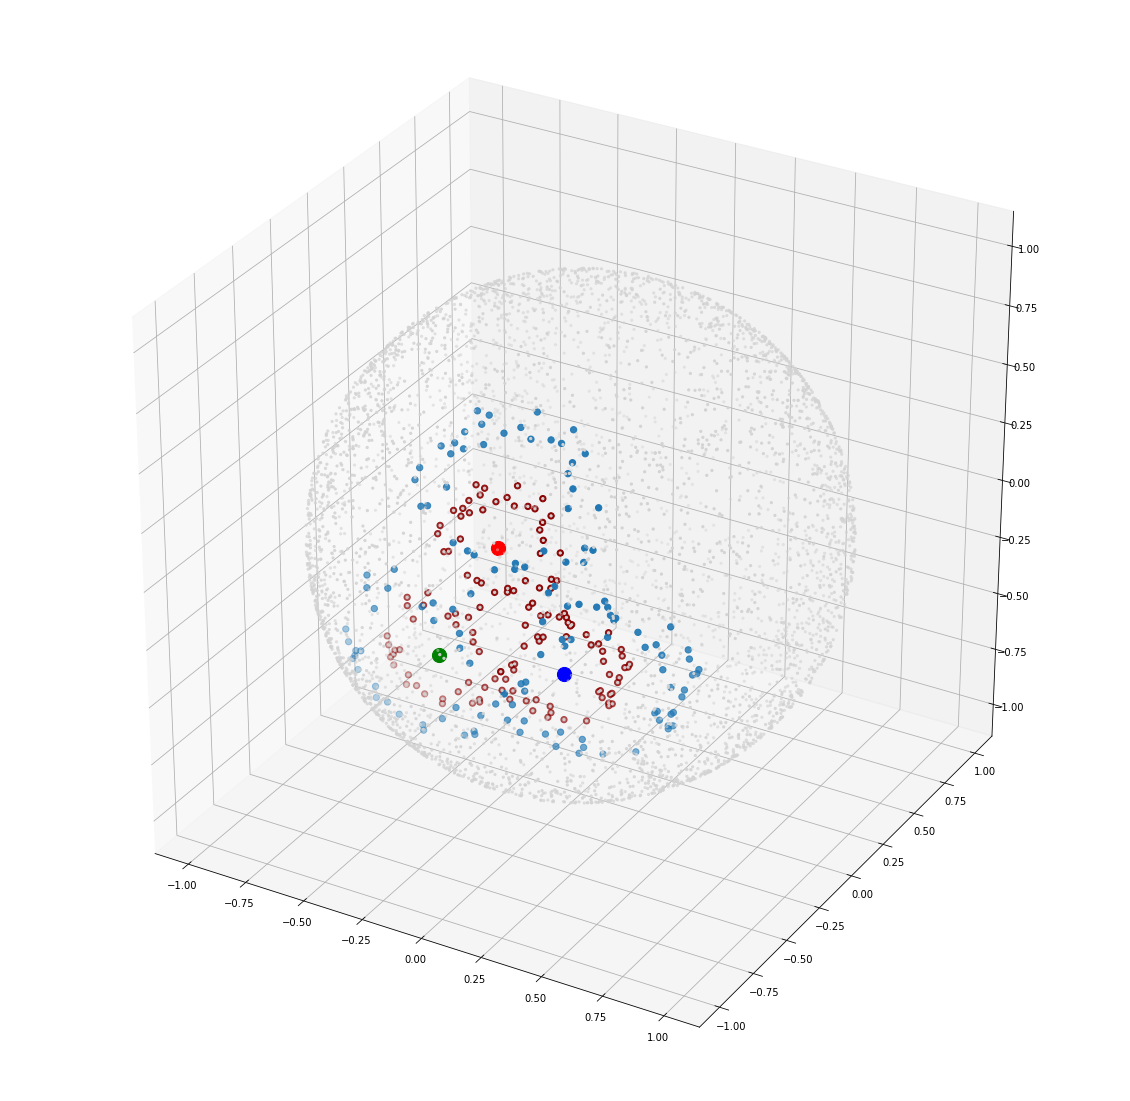

In [ ]:

fig = plt.figure(figsize=(20,20))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.scatter(x, y, z, c='lightgrey', s = 5)
ax.scatter(c1[0], c1[1], c1[2], c='blue', s = 200)
ax.scatter(c2[0], c2[1], c2[2], c='red', s = 200)
ax.scatter(c3[0], c3[1], c3[2], c='green', s = 200)
ax.scatter(ring_x, ring_y, ring_z, c='darkred', s = 40)
ax.scatter(updated_x, updated_y, updated_z, s = 40)
#ax.set_title('3D line plot geeks for geeks')

#plt.axes().set_aspect('equal')
plt.show()